# Plots the DFT ground state energy of the combined hBN-water system as a function of supercell size.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def make_df(data_path):
    df = pd.read_table(
        data_path,
        delim_whitespace=True,
        header=None,
        names=[
            "system",
            "num_atoms",
            "functional",
            "ecp",
            "ecut_ev",
            "Nk",
            "Ns",
            "total_energy_ryd",
        ],
    )
    return df


def plot_supercell_extrapolation(
    df, supercell_sizes, int_energies, plot_int_energy=True
):
    system = df["system"].values[0]
    functional = df["functional"].values[0]
    ecp = df["ecp"].values[0]
    ecut_ev = df["ecut_ev"].values[0]
    Nk = df["Nk"].values[0]
    plt.figure(figsize=(5, 5))
    plt.title(
        f"Supercell extrapolation for hBN-water system"
        + f"\n {functional}, {ecp}, E$_{{cut}}$ = {ecut_ev} eV, {Nk}x{Nk}x1 k-mesh"
    )
    plt.xlabel(r"$N_{s_x} \cdot N_{s_y}$")
    if plot_int_energy:
        plt.ylabel("DFT interaction energy (eV)")
        plt.plot(
            supercell_sizes,
            int_energies,
            linestyle="solid",
            marker="o",
        )
    else:
        df = df[df.system == "hBN_water_Oup_Hdown"]
        plt.ylabel("DFT total energy per atom (eV)")
        plt.plot(
            "supercell_size",
            "total_energy_ev",
            data=df,
            linestyle="solid",
            marker="o",
        )
    plt.savefig(
        f"/Users/Nathan/Desktop/supercell_extrapolation_{system}_{functional}_ecut_{ecut_ev}_{ecp}_Nk_{Nk}.png",
        dpi=300,
        bbox_inches="tight",
    )


def compute_int_energy(df):
    supercell_sizes = df.supercell_size.unique()
    int_energies = []
    water_energy = df[df.system == "water_Oup_Hdown"]["total_energy_ev"].values[0]
    for supercell_size in supercell_sizes:
        hBN_water_energy = df[
            (df.supercell_size == supercell_size) & (df.system == "hBN_water_Oup_Hdown")
        ]["total_energy_ev"].values[0]
        hBN_energy = df[(df.supercell_size == supercell_size) & (df.system == "hBN")][
            "total_energy_ev"
        ].values[0]
        int_energy = hBN_water_energy - hBN_energy - water_energy
        int_energies.append(int_energy)
    return supercell_sizes, int_energies

In [43]:
data_path = "total_energy_data.txt"
ryd_per_ev = 0.0734986176
df = make_df(data_path)
df["total_energy_ev"] = df["total_energy_ryd"].values / ryd_per_ev
df["total_energy_ev_per_atom"] = np.divide(
    df["total_energy_ev"].values, df["num_atoms"].values
)
df["supercell_size"] = np.power(df["Ns"].values, 2)
df

,system,num_atoms,functional,ecp,ecut_ev,Nk,Ns,total_energy_ryd,total_energy_ev,total_energy_ev_per_atom,supercell_size
0,hBN_water_Oup_Hdown,11,pbe,paw,700,3,1,-203.488394,-2768.601649,-251.691059,1
1,hBN_water_Oup_Hdown,35,pbe,paw,700,3,2,-681.869050,-9277.304415,-265.065840,4
2,hBN_water_Oup_Hdown,75,pbe,paw,700,3,3,-1479.158567,-20124.984866,-268.333132,9
3,hBN_water_Oup_Hdown,131,pbe,paw,700,3,4,-2595.362126,-35311.713483,-269.555065,16
4,hBN_water_Oup_Hdown,203,pbe,paw,700,3,5,-4030.481388,-54837.512869,-270.135531,25
5,hBN_water_Oup_Hdown,291,pbe,paw,700,3,6,-5784.515998,-78702.378175,-270.454908,36
6,hBN_water_Oup_Hdown,395,pbe,paw,700,3,7,-7857.465978,-106906.309728,-270.648885,49
7,hBN_water_Oup_Hdown,515,pbe,paw,700,3,8,-10249.331354,-139449.307873,-270.775355,64
8,hBN_water_Oup_Hdown,651,pbe,paw,700,3,9,-12960.115848,-176331.423247,-270.862401,81
9,hBN_water_Oup_Hdown,11,pbe,hgh,700,3,1,-135.402842,-1842.250180,-167.477289,1


Saving png file to /Users/Nathan/Desktop/dilute_limit_extrapolation_total_energy.png
Saving png file to /Users/Nathan/Desktop/dilute_limit_extrapolation_int_energy.png


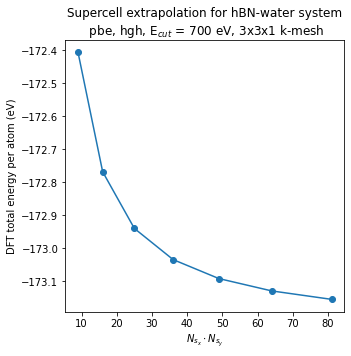

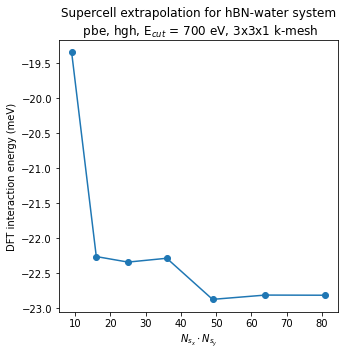

In [55]:
ecp = "hgh"
plot_sizes_above = 5
df_to_plot = df[df.ecp == ecp].copy()
supercell_sizes, int_energies = compute_int_energy(df_to_plot)
for plot_int_energy in [False, True]:
    plot_supercell_extrapolation(
        df_to_plot[df_to_plot.supercell_size > plot_sizes_above],
        supercell_sizes[supercell_sizes > plot_sizes_above],
        int_energies[supercell_sizes > plot_sizes_above],
        plot_int_energy=plot_int_energy,
    )